In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
%matplotlib inline
sns.set_style('darkgrid')

In [75]:
data = pd.read_csv('auto_example_dataset.csv')
data.head()

,vin,start_timstm,end_timstm,start_odometer,end_odometer
0,1G1RA6E41FU100024,44000.61,44000.63,122284.31,122296.28
1,1G1RA6E41FU100024,44001.13,44001.13,122296.28,122300.89
2,1G1RA6E41FU100024,44001.17,44001.18,122300.89,122305.48
3,1G1RA6E41FU100024,44001.25,44001.25,122305.48,122305.52
4,1G1RC6E49FU100007,44000.63,44000.64,88171.53,88177.53


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392418 entries, 0 to 392417
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   vin             392418 non-null  object 
 1   start_timstm    392418 non-null  float64
 2   end_timstm      392418 non-null  float64
 3   start_odometer  392418 non-null  float64
 4   end_odometer    392418 non-null  float64
dtypes: float64(4), object(1)
memory usage: 15.0+ MB


In [77]:
data['odometer_diff'] = data['end_odometer']-data['start_odometer']

In [78]:
data.head()

,vin,start_timstm,end_timstm,start_odometer,end_odometer,odometer_diff
0,1G1RA6E41FU100024,44000.61,44000.63,122284.31,122296.28,11.97
1,1G1RA6E41FU100024,44001.13,44001.13,122296.28,122300.89,4.61
2,1G1RA6E41FU100024,44001.17,44001.18,122300.89,122305.48,4.59
3,1G1RA6E41FU100024,44001.25,44001.25,122305.48,122305.52,0.04
4,1G1RC6E49FU100007,44000.63,44000.64,88171.53,88177.53,6.00


In [79]:
sum(n < 0 for n in data['odometer_diff'])

1215

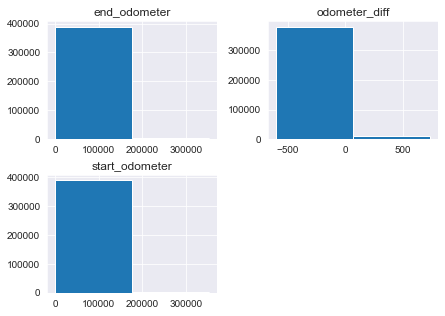

In [80]:
data.drop(['vin', 'start_timstm', 'end_timstm'],axis = 1).hist( figsize=(7,5), bins=2);

In [81]:
vin_count = data['vin'].nunique()
print(vin_count)

91080


In [82]:
good_rows = data[data['odometer_diff'] >= 0].index
bad_data = data.drop(good_rows,axis = 0)

In [83]:
bad_data.head()

,vin,start_timstm,end_timstm,start_odometer,end_odometer,odometer_diff
1365,1G1RB6E49FU117537,43999.68,43999.70,98610.75,98610.72,-0.03
3999,KL8CL6S0XGC558220,44001.28,44001.28,75267.38,75267.34,-0.04
4736,1G1RC6S54GU128733,44000.66,44000.69,105882.39,105882.34,-0.05
6976,1G1RC6S53GU138878,44000.71,44000.71,108891.02,108891.00,-0.02
8319,KL8CK6S03GC587416,43998.17,44000.68,88292.28,88117.25,-175.03


In [84]:
bad_vin_count = bad_data['vin'].nunique()
print(bad_vin_count)

1160


In [85]:
count = bad_data.groupby('vin').size()
count

vin
1G1FW6S00H4130091    1
1G1FW6S00H4137493    1
1G1FW6S00H4143794    1
1G1FW6S00H4148655    1
1G1FW6S00H4148834    1
                    ..
LREKK5RX0HA062165    1
LREKK5RX2HA055993    1
LREKK5RX7HA048280    1
LREKK5RX9HA025793    1
LREKK5RXXJA012220    1
Length: 1160, dtype: int64

In [86]:
count.to_csv('out.csv')

In [87]:
countf = pd.read_csv('out.csv')
countf.head()

,vin,0
0,1G1FW6S00H4130091,1
1,1G1FW6S00H4137493,1
2,1G1FW6S00H4143794,1
3,1G1FW6S00H4148655,1
4,1G1FW6S00H4148834,1


In [88]:
pd.value_counts(countf['0'])

1    1112
2      41
3       7
Name: 0, dtype: int64

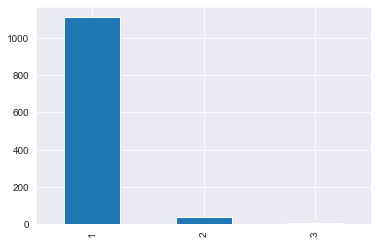

In [89]:
pd.value_counts(countf['0']).plot.bar()

In [90]:
data.head()

,vin,start_timstm,end_timstm,start_odometer,end_odometer,odometer_diff
0,1G1RA6E41FU100024,44000.61,44000.63,122284.31,122296.28,11.97
1,1G1RA6E41FU100024,44001.13,44001.13,122296.28,122300.89,4.61
2,1G1RA6E41FU100024,44001.17,44001.18,122300.89,122305.48,4.59
3,1G1RA6E41FU100024,44001.25,44001.25,122305.48,122305.52,0.04
4,1G1RC6E49FU100007,44000.63,44000.64,88171.53,88177.53,6.00


In [91]:
aggregate_functions = {'start_timstm' : 'first','end_timstm' : 'last','start_odometer' : 'first','end_odometer': 'last','odometer_diff': 'sum'}
adata = data.groupby(data['vin']).aggregate(aggregate_functions)
adata.head()

,start_timstm,end_timstm,start_odometer,end_odometer,odometer_diff
vin,,,,,
1G1FB6S0XN40005EX,44000.46,44001.33,2036.28,2235.75,199.47
1G1FW6S00H4124761,44000.63,44001.56,116785.11,116907.94,122.81
1G1FW6S00H4125070,44000.63,44001.40,35465.00,35496.22,27.61
1G1FW6S00H4125845,44000.76,44000.82,46444.06,46529.19,85.13
1G1FW6S00H4126039,44000.73,44001.25,40157.23,40248.00,120.51


In [92]:
adata['agg_odometer_diff'] = adata['end_odometer']-adata['start_odometer']
adata.head()

,start_timstm,end_timstm,start_odometer,end_odometer,odometer_diff,agg_odometer_diff
vin,,,,,,
1G1FB6S0XN40005EX,44000.46,44001.33,2036.28,2235.75,199.47,199.47
1G1FW6S00H4124761,44000.63,44001.56,116785.11,116907.94,122.81,122.83
1G1FW6S00H4125070,44000.63,44001.40,35465.00,35496.22,27.61,31.22
1G1FW6S00H4125845,44000.76,44000.82,46444.06,46529.19,85.13,85.13
1G1FW6S00H4126039,44000.73,44001.25,40157.23,40248.00,120.51,90.77


In [93]:
adata['agg_percent'] = adata['odometer_diff']/adata['agg_odometer_diff']*100
adata.head()

,start_timstm,end_timstm,start_odometer,end_odometer,odometer_diff,agg_odometer_diff,agg_percent
vin,,,,,,,
1G1FB6S0XN40005EX,44000.46,44001.33,2036.28,2235.75,199.47,199.47,100.000000
1G1FW6S00H4124761,44000.63,44001.56,116785.11,116907.94,122.81,122.83,99.983717
1G1FW6S00H4125070,44000.63,44001.40,35465.00,35496.22,27.61,31.22,88.436899
1G1FW6S00H4125845,44000.76,44000.82,46444.06,46529.19,85.13,85.13,100.000000
1G1FW6S00H4126039,44000.73,44001.25,40157.23,40248.00,120.51,90.77,132.764129


In [94]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91080 entries, 1G1FB6S0XN40005EX to LREKK5RXXJA055536
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   start_timstm       91080 non-null  float64
 1   end_timstm         91080 non-null  float64
 2   start_odometer     91080 non-null  float64
 3   end_odometer       91080 non-null  float64
 4   odometer_diff      91080 non-null  float64
 5   agg_odometer_diff  91080 non-null  float64
 6   agg_percent        90015 non-null  float64
dtypes: float64(7)
memory usage: 5.6+ MB


In [95]:
sum(n == 0 for n in adata['agg_odometer_diff'])

1085

In [96]:
good_sum = adata[adata['agg_odometer_diff'] != 0].index
bad_sum_data = adata.drop(good_sum,axis = 0)
bad_sum_data.head()

,start_timstm,end_timstm,start_odometer,end_odometer,odometer_diff,agg_odometer_diff,agg_percent
vin,,,,,,,
1G1FW6S00H4137395,44000.78,44000.78,88192.89,88192.89,0.0,0.0,NaN
1G1FW6S00H4156772,44000.46,44001.34,107780.88,107780.88,0.0,0.0,NaN
1G1FW6S00H4157260,44001.41,44001.43,56144.55,56144.55,0.0,0.0,NaN
1G1FW6S00H4158361,44000.73,44000.74,42688.47,42688.47,0.0,0.0,NaN
1G1FW6S00H4159008,44000.62,44000.65,50024.05,50024.05,0.0,0.0,NaN


In [97]:
#dropping 0 values
bad_sum = adata[adata['agg_odometer_diff'] == 0].index
adata = adata.drop(bad_sum,axis = 0)

In [98]:
adata.head()

,start_timstm,end_timstm,start_odometer,end_odometer,odometer_diff,agg_odometer_diff,agg_percent
vin,,,,,,,
1G1FB6S0XN40005EX,44000.46,44001.33,2036.28,2235.75,199.47,199.47,100.000000
1G1FW6S00H4124761,44000.63,44001.56,116785.11,116907.94,122.81,122.83,99.983717
1G1FW6S00H4125070,44000.63,44001.40,35465.00,35496.22,27.61,31.22,88.436899
1G1FW6S00H4125845,44000.76,44000.82,46444.06,46529.19,85.13,85.13,100.000000
1G1FW6S00H4126039,44000.73,44001.25,40157.23,40248.00,120.51,90.77,132.764129


In [99]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89995 entries, 1G1FB6S0XN40005EX to LREKK5RXXJA055536
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   start_timstm       89995 non-null  float64
 1   end_timstm         89995 non-null  float64
 2   start_odometer     89995 non-null  float64
 3   end_odometer       89995 non-null  float64
 4   odometer_diff      89995 non-null  float64
 5   agg_odometer_diff  89995 non-null  float64
 6   agg_percent        89995 non-null  float64
dtypes: float64(7)
memory usage: 5.5+ MB


In [113]:
adata['bins'] = pd.cut(adata['agg_percent'],bins = [float("-inf"),90,95,99,100,float("inf")], labels = ["Below 90%", "90%-95%","95%-99%","99%-100%","Over 100%"])
pie_data = adata.groupby( 'bins').size()

In [114]:
pie_data

bins
Below 90%     6256
90%-95%       1275
95%-99%       1935
99%-100%     78034
Over 100%     2495
dtype: int64

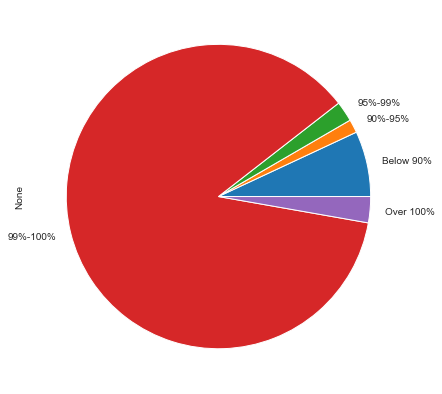

In [115]:
pie_data.plot.pie(figsize=(7,7))